## Import Modules

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.1.0
GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Load and Explore the Dataset

*Essential info about tagged entities*:
- geo = Geographical Entity
- org = Organization
- per = Person
- gpe = Geopolitical Entity
- tim = Time indicator
- art = Artifact
- eve = Event
- nat = Natural Phenomenon

In [ ]:
data = pd.read_csv('ner_dataset.csv',encoding='latin1') #the data is encoded as latin1
data = data.fillna(method='ffill') #filling the missing values 
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [ ]:
print("Unique words in corpus :",data['Word'].nunique()) #displaying the no of unique words in the column 'Word'
print("Unique tags in corpus :",data['Tag'].nunique()) #displaying the no of unique tags in the column 'Tag'

Unique words in corpus : 35178
Unique tags in corpus : 17


In [ ]:
words = list(set(data['Word'].values)) #finding the unique words in the column 'Word'
words.append("ENDPAD") 
num_words=len(words)

In [ ]:
tags = list(set(data['Tag'].values))
num_tags=len(tags)

In [ ]:
num_words, num_tags

(35179, 17)

## Retrieve Sentences and Corresponsing Tags

In [ ]:
class SentenceGetter(object):
    def __init__(self,data):
        self.n_sent = 1 #counter to count the no od sentences
        self.data = data
        #defining a function to get the sentence in the form of list of tuples
        agg_func = lambda s: [(w,p,t) for w,p,t in zip(s["Word"].values.tolist(),
                                                      s["POS"].values.tolist(),
                                                      s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func) #grouping by sentences
        self.sentences = [s for s in self.grouped] #getting a list of sentences

In [ ]:
getter = SentenceGetter(data) 
sentences = getter.sentences #getting the list of sentences

In [ ]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

## Defining Mappings

In [ ]:
word2idx = {w: i+1 for i, w in enumerate(words)}
tag2idx = {t: i for i,t in enumerate(tags)}

In [ ]:
word2idx

{'Kandal': 1,
 'disaster': 2,
 'circular': 3,
 'paths': 4,
 'greatest': 5,
 'Hennes': 6,
 'end': 7,
 'Gulfport': 8,
 'Jean-Louis': 9,
 'Imports': 10,
 're-opened': 11,
 'de-facto': 12,
 'men': 13,
 '2023': 14,
 'Hanouichi': 15,
 'Mikasa': 16,
 'next': 17,
 'fifth-seeded': 18,
 'increase': 19,
 'Cai': 20,
 'slandered': 21,
 'Abizaid': 22,
 'statistically': 23,
 'sixth-seed': 24,
 'Gonzales': 25,
 'Bussereau': 26,
 'suppresses': 27,
 'Landslides': 28,
 'per': 29,
 'Valenica': 30,
 'Kazemi': 31,
 'Maldives': 32,
 '201': 33,
 'flare': 34,
 'KITES': 35,
 'Fuge': 36,
 'recorder': 37,
 'kingpin': 38,
 'Alexi': 39,
 'Zabayda': 40,
 '299': 41,
 'FLEA': 42,
 'Soviet-imposed': 43,
 'IMB': 44,
 'Aided': 45,
 'eight-legged': 46,
 'eyebrow': 47,
 'Timber': 48,
 'expense': 49,
 'Schoomaker': 50,
 'biathlon': 51,
 'bringing': 52,
 'smoking': 53,
 'Townsend': 54,
 'Petronas': 55,
 'would': 56,
 'taka': 57,
 '113': 58,
 'bankroll': 59,
 'duty': 60,
 'recognition': 61,
 'energy-efficient': 62,
 'substati

In [ ]:
tag2idx

{'B-geo': 0,
 'B-gpe': 1,
 'B-tim': 2,
 'I-nat': 3,
 'I-per': 4,
 'B-org': 5,
 'I-tim': 6,
 'O': 7,
 'B-per': 8,
 'I-art': 9,
 'B-nat': 10,
 'I-eve': 11,
 'I-org': 12,
 'B-eve': 13,
 'I-geo': 14,
 'B-art': 15,
 'I-gpe': 16}

## Padding Input Sentences and Creating Train/Test Splits

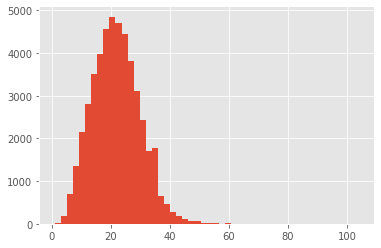

In [ ]:
plt.hist([len(s) for s in sentences],bins=50) #plotting the distribution of sentence length
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 50 #permitting the max_length of sentences to be of 50 after padding

X = [[word2idx[w[0]] for w in s] for s in sentences] 
X = pad_sequences(maxlen=max_len, sequences=X, padding='post',value=num_words-1) 

y=[[tag2idx[w[2]] for w in s] for s in sentences] 
y=pad_sequences(maxlen=max_len, sequences=y, padding='post', value=tag2idx["O"])
y=[to_categorical(i,num_classes=num_tags) for i in y] #creating one-hot encoding

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1) 

## Build and Compile a Bidirectional LSTM Model

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [ ]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=max_len, input_length=max_len)(input_word) 
model = SpatialDropout1D(0.1)(model) 
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out=TimeDistributed(Dense(num_tags,activation='softmax'))(model)
model=Model(input_word,out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 200)           120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## Train the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

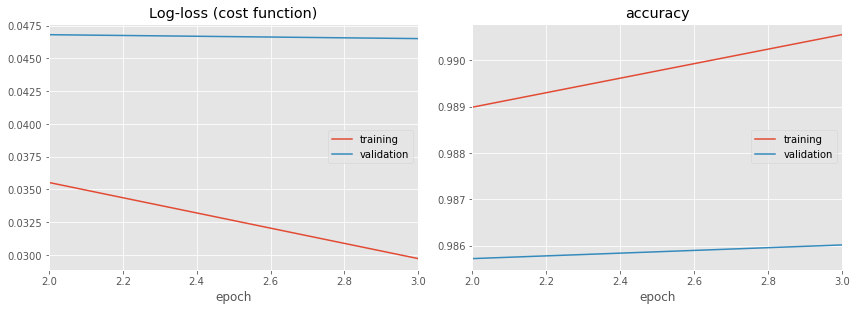

Log-loss (cost function):
training   (min:    0.030, max:    0.047, cur:    0.030)
validation (min:    0.047, max:    0.048, cur:    0.047)

accuracy:
training   (min:    0.986, max:    0.991, cur:    0.991)
validation (min:    0.985, max:    0.986, cur:    0.986)
34530/34530 [==============================] - 184s 5ms/sample - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0465 - val_accuracy: 0.9860


In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=1,verbose=0, mode='max',restore_best_weights=False)
callbacks = [PlotLossesCallback(),early_stopping]

history = model.fit(
    x_train,np.array(y_train),  
    validation_split=0.2,
    batch_size=32,
    epochs=3,
    verbose=1,
    callbacks=callbacks
)

## Evaluating Named Entity Recognition Model

In [ ]:
model.evaluate(x_test,np.array(y_test))

4796/4796 [==============================] - 5s 1ms/sample - loss: 0.0481 - accuracy: 0.9858


[0.048082891562712796, 0.98576313]

In [ ]:
i=np.random.randint(0,x_test.shape[0]) 
p = model.predict(np.array([x_test[i]])) 
p = np.argmax(p, axis=-1) #getting the label from one-hot encoded vector

y_true=np.argmax(np.array(y_test),axis=-1)[i] #selecting the true label of the i'th random example 
print("{:15}{:5}\t {}\n".format("Word", "True","Pred"))
print("-"*30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1],tags[true],tags[pred]))

Word           True 	 Pred

------------------------------
The            B-org	B-org
Associated     I-org	B-org
Press          I-org	I-org
says           O	O
the            O	O
recommendation O	O
by             O	O
Colonel        O	O
James          B-per	B-per
Daniel         I-per	I-per
will           O	O
be             O	O
forwarded      O	O
to             O	O
Army           B-org	B-org
officials      O	O
for            O	O
a              O	O
final          O	O
decision       O	O
.              O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O
JEM            O	O


In [2]:
print("hi")

hi
